# Satellite Dataset Visualization

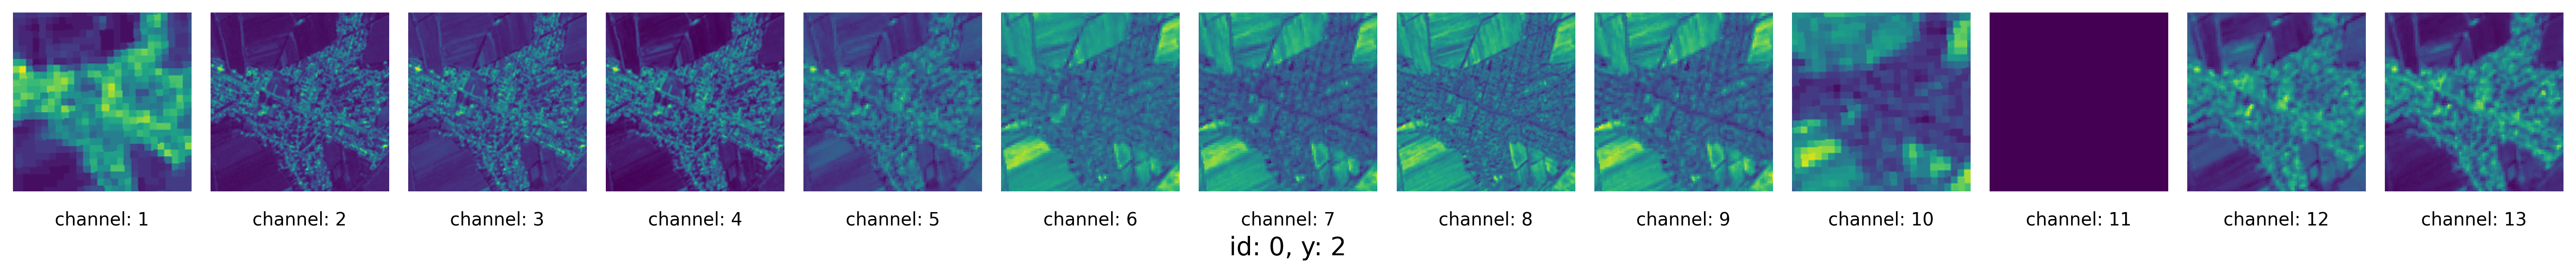

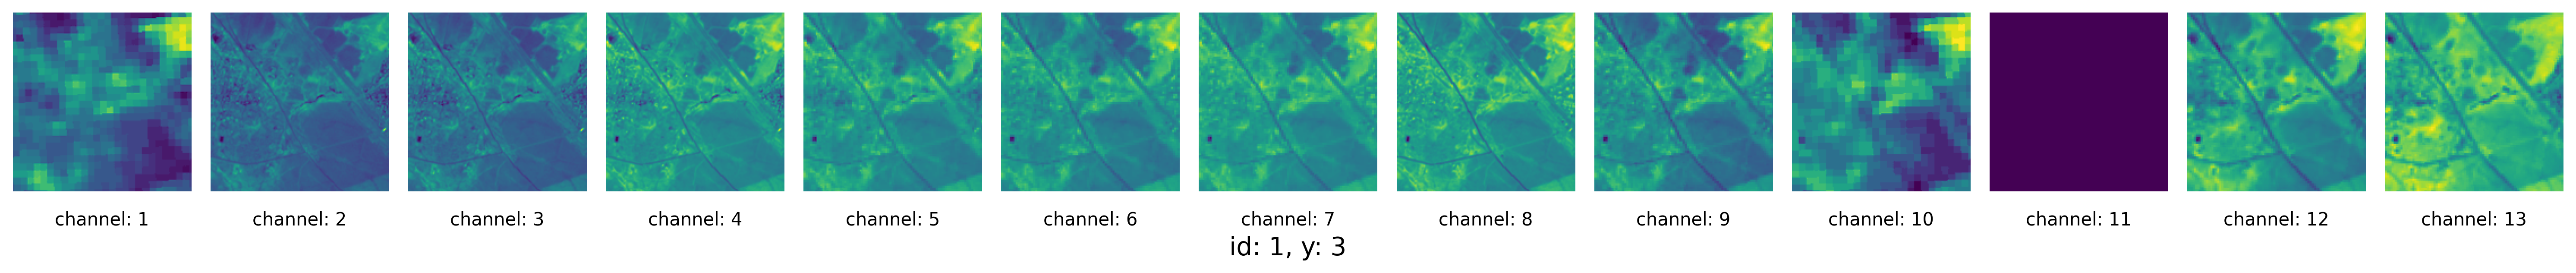

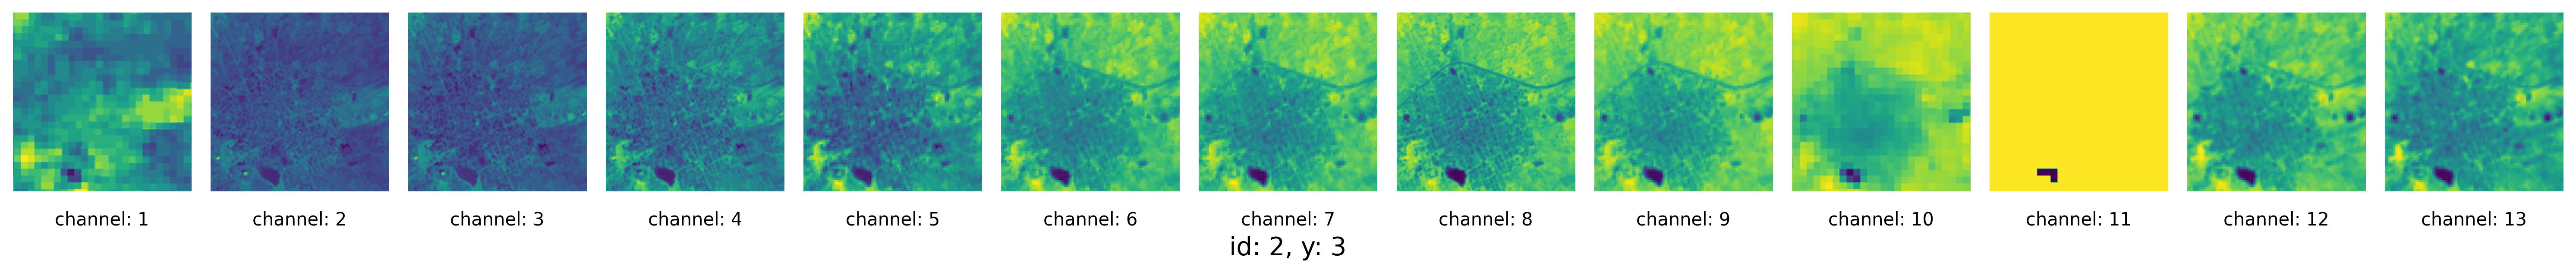

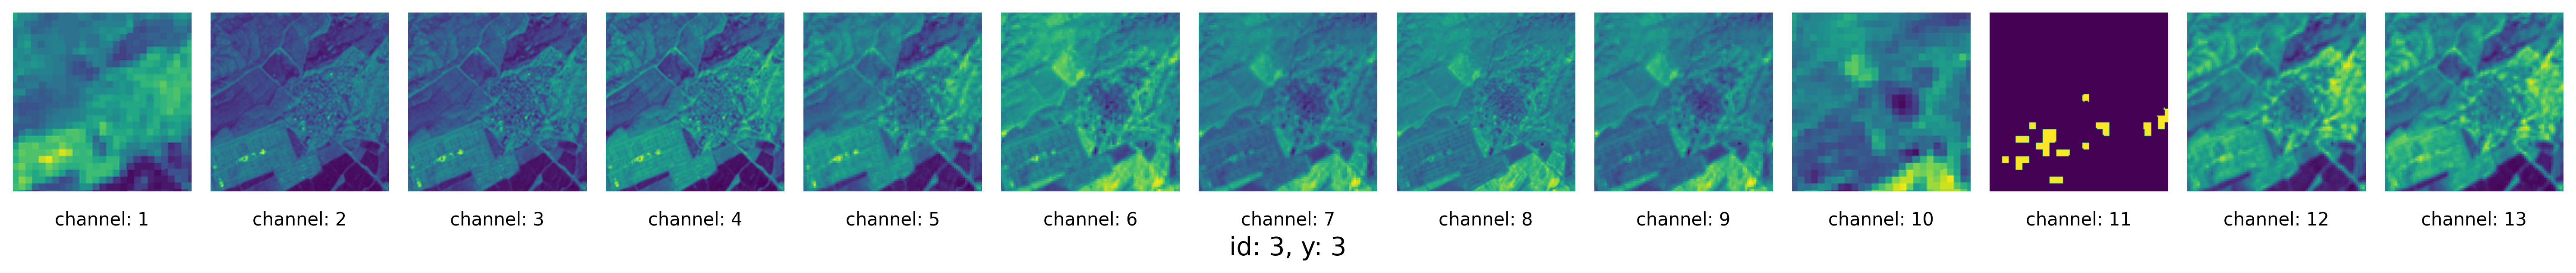

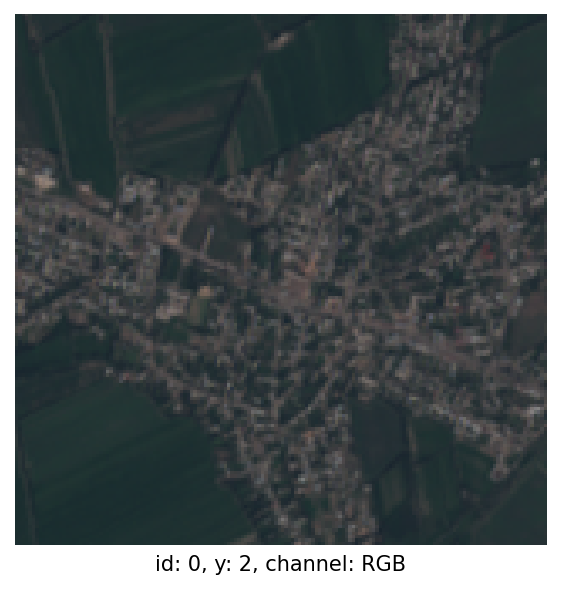

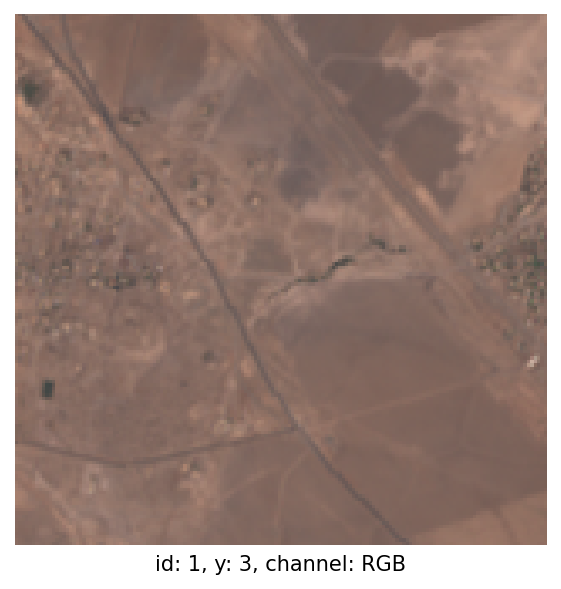

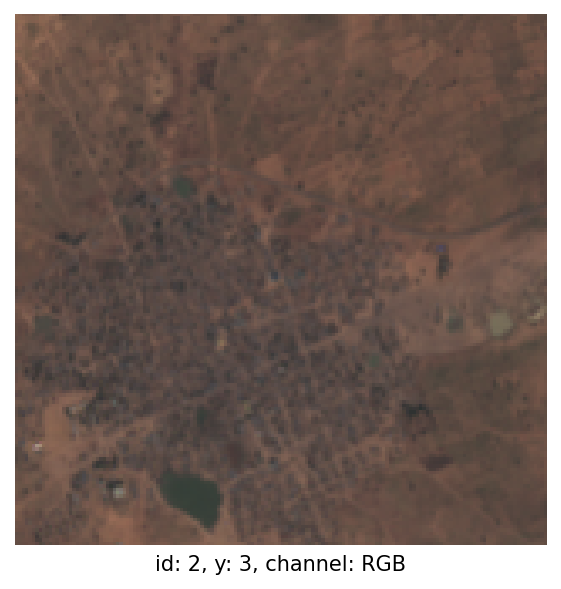

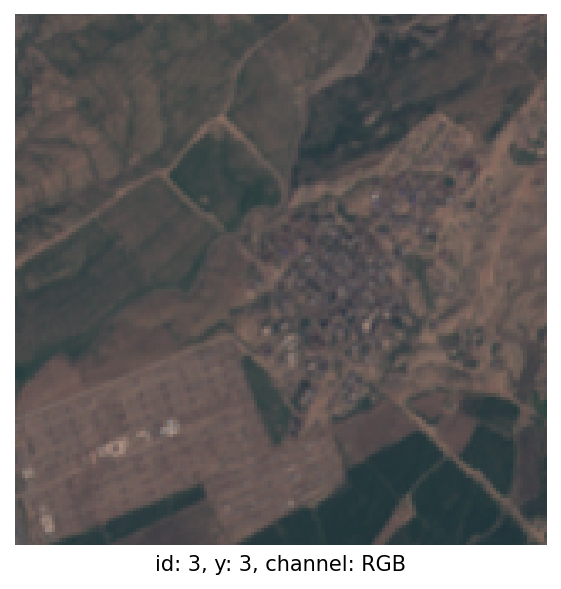

In [141]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_name : str, n_lines : int) -> list:
    records = []
    with open(file_name, 'r') as file:
        file.readline() # skip the header line

        for _ in range(n_lines):
            line = file.readline().strip().split(',')
            record_id, label, *image_data = map(float, line)

            image_data = np.array(image_data, dtype=int).reshape(13, 158, 158)
            data.append({
                "id": int(record_id),
                "y": int(label),
                "data": image_data
            })

    return records


def plot_all_channels(records: list):
    for record in records:
        record_id = record["id"]
        label = record["y"]

        plt.figure(figsize=(20,4), dpi=300)
        plt.suptitle(f'id: {record_id}, y: {label}', y=0.2, x=0.5, fontsize=14)
        for channel in range(13):
            plt.subplot(1, 13, channel + 1)
            plt.title(f"channel: {channel + 1}", fontsize=10, y=-0.25)
            plt.axis('off')
            plt.imshow(record["data"][channel,:,:])
        plt.tight_layout()
        plt.show()


def plot_rgb(data: list):
    for record in data:
        id = record["id"]
        y = record["y"]

        plt.figure(figsize=(20,4), dpi=150)
        plt.title(f"id: {id}, y: {y}, channel: RGB", fontsize=10,y=-0.07)
        plt.axis('off')
        img = record["data"][1:4,:,:]
        img = np.moveaxis(img, 0, -1)
        img = img[:,:,::-1]
        plt.imshow(img)
        plt.tight_layout()
        plt.show()


data = read_data('satellite_party0_test.csv', 4)
plot_all_channels(data)
plot_rgb(data)

# Sentinel 2 Bands
Sentinel-2 carries the Multispectral Imager (MSI). This sensor delivers `13 spectral bands` ranging from 10 to 60-meter pixel size.

- Its blue (B2), green (B3), red (B4), and near-infrared (B8) channels have a 10-meter resolution.

- Next, its red edge (B5), near-infrared NIR (B6, B7, and B8A), and short-wave infrared SWIR (B11 and B12) have a ground sampling distance of 20 meters.

- Finally, its coastal aerosol (B1) and cirrus band (B10) have a 60-meter pixel size.

| Band | Resolution | Central Wavelength | Description                           |
|------|------------|--------------------|---------------------------------------|
| B1   | 60 m       | 443 nm             | Ultra Blue (Coastal and Aerosol)      |
| B2   | 10 m       | 490 nm             | Blue                                  |
| B3   | 10 m       | 560 nm             | Green                                 |
| B4   | 10 m       | 665 nm             | Red                                   |
| B5   | 20 m       | 705 nm             | Visible and Near Infrared (VNIR)      |
| B6   | 20 m       | 740 nm             | Visible and Near Infrared (VNIR)      |
| B7   | 20 m       | 783 nm             | Visible and Near Infrared (VNIR)      |
| B8   | 10 m       | 842 nm             | Visible and Near Infrared (VNIR)      |
| B8a  | 20 m       | 865 nm             | Visible and Near Infrared (VNIR)      |
| B9   | 60 m       | 940 nm             | Short Wave Infrared (SWIR)            |
| B10  | 60 m       | 1375 nm            | Short Wave Infrared (SWIR)            |
| B11  | 20 m       | 1610 nm            | Short Wave Infrared (SWIR)            |
| B12  | 20 m       | 2190 nm            | Short Wave Infrared (SWIR)            |


Reference: https://gisgeography.com/sentinel-2-bands-combinations/